# From Biological to Artificial Neurons
## The Perceptron

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API
### Using Keras to load the dataset

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Creating the model using the Sequential API

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [8]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


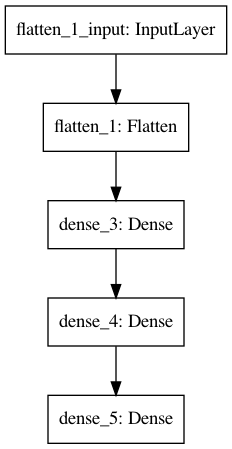

In [10]:
keras.utils.plot_model(model)

In [11]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [14]:
model.get_layer('dense_3') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()
weights

array([[-0.0104838 ,  0.05387136,  0.00724469, ...,  0.02730262,
         0.0660186 ,  0.06298524],
       [-0.07003306,  0.02263077, -0.03978244, ..., -0.07052936,
        -0.01437077,  0.04371888],
       [-0.02478315, -0.00997329,  0.06979702, ...,  0.03173816,
        -0.0606236 , -0.02715002],
       ...,
       [ 0.04856099,  0.01355252, -0.0182701 , ..., -0.00434037,
        -0.045602  , -0.02462491],
       [ 0.00526366, -0.00203015,  0.00665461, ...,  0.04967949,
         0.04050989, -0.04979835],
       [-0.00035969, -0.04711885, -0.05033031, ...,  0.03858304,
         0.06872866, -0.04057499]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [16]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

Note that Dense layer initialized connection weights randomly (required to break symmetry) and biases to zeros. Can use ```kernel_initializer``` and ```bias_initializer``` to tweak these.

### Compiling the model

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

### Training and evaluating the model

In [20]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7145 - accuracy: 0.7676 - val_loss: 0.5229 - val_accuracy: 0.8194
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4886 - accuracy: 0.8294 - val_loss: 0.4660 - val_accuracy: 0.8346
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4444 - accuracy: 0.8435 - val_loss: 0.4396 - val_accuracy: 0.8428
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4152 - accuracy: 0.8543 - val_loss: 0.3989 - val_accuracy: 0.8678
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3955 - accuracy: 0.8601 - val_loss: 0.3892 - val_accuracy: 0.8678
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3798 - accuracy: 0.8655 - val_loss: 0.3738 - val_accuracy: 0.8720
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3643 - accuracy: 0.8700 - val_loss: 0.3581 - val_accuracy:

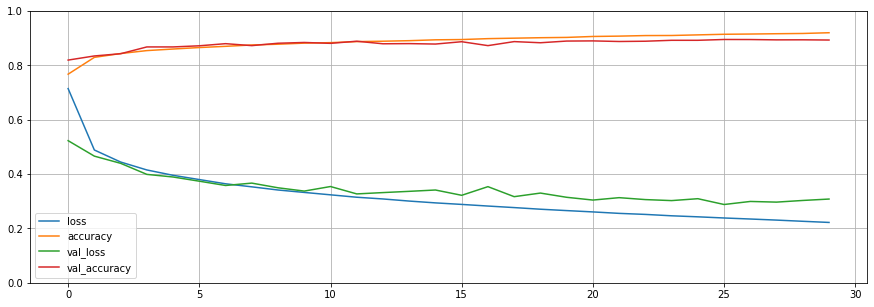

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(15, 5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

looking good! training and validation accuracy steadily increase while training and validation loss decrease. validation curves are also close to training curves, indicating that overfitting doesn't look like a concern.

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 63.7630 - accuracy: 0.8475


[63.763038635253906, 0.8475000262260437]

### Using the model to make predictions

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [28]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP Using the Sequential API

In [30]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.1472 - val_loss: 0.5401
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5004 - val_loss: 0.4586
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4669 - val_loss: 0.4433
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4489 - val_loss: 0.4249
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4282 - val_loss: 0.4162
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4173 - val_loss: 0.4096
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4090 - val_loss: 0.4101
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4023 - val_loss: 0.4019
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3986 - val_loss: 0.3884
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3964 - val_loss: 0.3873

In [32]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] # "pretending" these are new instances
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 823us/step - loss: 0.3797


## Building Complex Models Using the Functional API

In [33]:
# wide and deep
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

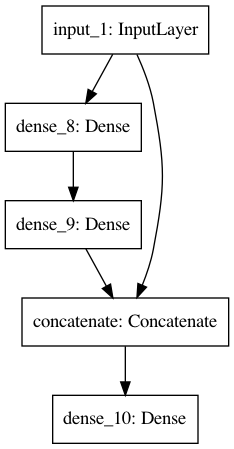

In [34]:
keras.utils.plot_model(model)

can also send a subset of features through wide and another subset through deep, like below

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

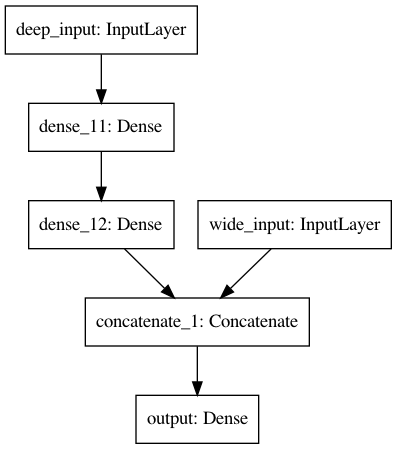

In [36]:
keras.utils.plot_model(model)

In [39]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5057 - val_loss: 0.4984
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5019 - val_loss: 0.4947
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4984 - val_loss: 0.4907
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4953 - val_loss: 0.4879
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4924 - val_loss: 0.4861
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4895 - val_loss: 0.4822
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4873 - val_loss: 0.4808
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4849 - val_loss: 0.4781
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4830 - val_loss: 0.4762
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4810 - val_loss: 0.4738

add extra outputs!

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

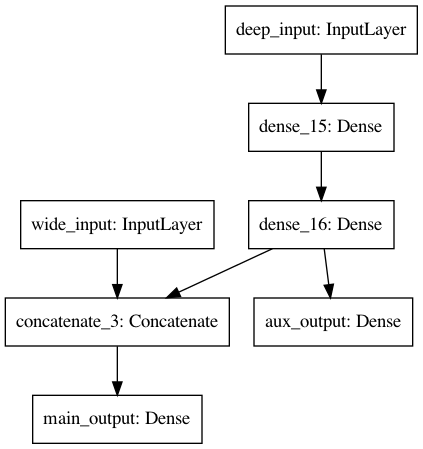

In [42]:
keras.utils.plot_model(model)

each output needs its own loss function

In [43]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer="sgd")
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0441 - main_output_loss: 0.9678 - aux_output_loss: 1.7305 - val_loss: 0.6094 - val_main_output_loss: 0.5583 - val_aux_output_loss: 1.0693
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8488 - main_output_loss: 0.8295 - aux_output_loss: 1.0220 - val_loss: 0.5366 - val_main_output_loss: 0.5006 - val_aux_output_loss: 0.8612
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5239 - main_output_loss: 0.4925 - aux_output_loss: 0.8069 - val_loss: 0.4995 - val_main_output_loss: 0.4703 - val_aux_output_loss: 0.7621
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4963 - main_output_loss: 0.4697 - aux_output_loss: 0.7351 - val_loss: 0.4775 - val_main_output_loss: 0.4514 - val_aux_output_loss: 0.7120
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4832 - main_output_loss: 0.4597 - aux_output_loss: 0.6950 - val_loss

In [44]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 1ms/step - loss: 0.4122 - main_output_loss: 0.3935 - aux_output_loss: 0.5808


In [45]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

## Using the Subclassing API to Build Dynamic Models

In [46]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs) # for standard args like name
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
    
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel()

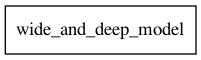

In [47]:
keras.utils.plot_model(model)

notice that using the subclassing API makes it so that keras can't see as many details about the model so easily! in the next section, we learn to save and restore a model; note that this does not work with the subclassing API. however, subclassing can make it easy to do many things within the call method (loops, etc.), so this is the tradeoff we have.

## Saving and Restoring a Model

In [51]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8025 - val_loss: 0.5450
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6214 - val_loss: 0.4928
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4692 - val_loss: 0.4621
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4511 - val_loss: 0.4480
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4451 - val_loss: 0.4498
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4349 - val_loss: 0.4295
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4398 - val_loss: 0.4287
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4270 - val_loss: 0.4259
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4215 - val_loss: 0.4213
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4136 - val_loss: 0.4121

In [52]:
model.save("my_keras_model.h5")

In [54]:
loaded_model = keras.models.load_model("my_keras_model.h5")
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Using Callbacks
Objects that keras will call at the start and end of training, the start and end of epochs, before/after processing a batch.

In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 852us/step - loss: 0.3812
Epoch 2/10
363/363 [==============================] - 0s 878us/step - loss: 0.3849
Epoch 3/10
363/363 [==============================] - 0s 850us/step - loss: 0.3832
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3755
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3733
Epoch 6/10
363/363 [==============================] - 0s 886us/step - loss: 0.3727
Epoch 7/10
363/363 [==============================] - 0s 991us/step - loss: 0.3787
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3708A: 0s - loss: 0.3
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3761
Epoch 10/10
363/363 [==============================] - 0s 892us/step - loss: 0.3694


Can also use callbacks as an easy way to implement early stopping!

In [56]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # roll back to the best model!

Epoch 1/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3694 - val_loss: 0.3626
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.3634 - val_loss: 0.3639
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3655 - val_loss: 0.3635
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3619 - val_loss: 0.3607
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3663 - val_loss: 0.3585
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3668 - val_loss: 0.3556
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3626 - val_loss: 0.3527
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3608 - val_loss: 0.3536
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3566 - val_loss: 0.3548
Epoch 10/10
363/363 [==============================] - 0s 1ms/step - loss: 0.3558 - val_loss: 0.3548

Can also directly use the ```EarlyStopping``` callback

In [57]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3577 - val_loss: 0.3513
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3572 - val_loss: 0.3528
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3540 - val_loss: 0.3502
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3564 - val_loss: 0.3487
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3524 - val_loss: 0.3498
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3642 - val_loss: 0.3662
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 0.3508
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3501 - val_loss: 0.3451
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3488 - val_loss: 0.3451
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3462 - val_lo

can also write custom callbacks! these can be useful for debugging (e.g. on_train_begin(), on_epoch_end() etc.)

In [58]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

## Using TensorBoard for Visualization

In [59]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[tensorboard_cb])

Epoch 1/30
  1/363 [..............................] - ETA: 0s - loss: 0.1627WARNING:tensorflow:From /Users/ericfiegel/GitHub/ml-geron/env/lib/python3.7/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
363/363 [==============================] - 1s 1ms/step - loss: 0.3392 - val_loss: 0.3376
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3333 - val_loss: 0.3293
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3315 - val_loss: 0.3720
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3483 - val_loss: 0.3264
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3259 - val_loss: 0.3253
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.3319 - val_loss: 0.3879
Epoch 7/30
363/363 [==========

In [65]:
# can run this from the command line or from right here in jupyter!
# %load_ext tensorboard
# %tensorboard --logdir=./my_logs --port=6006

# Fine-Tuning Neural Network Hyperparameters